In [1]:
# Load the extension in your notebook
%load_ext tensorboard


import numpy as np
import pandas as pd
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,12)
plt.rcParams.update({'font.size': 16})



In [2]:
df_stackelberg = pd.DataFrame()
ea = event_accumulator.EventAccumulator(f'runs4/experiment_stackelberg2023-09-23 10:27:10.806711_drawless', size_guidance={event_accumulator.SCALARS: 0},
)

ea.Reload()
dfs = pd.DataFrame(ea.Scalars('average returns'))
dfs.index = dfs.index * 32
dfs

,wall_time,step,value
0,1.695479e+09,0,-431.131561
32,1.695479e+09,1,-593.502319
64,1.695479e+09,2,-368.092285
96,1.695479e+09,3,-495.132996
128,1.695479e+09,4,-620.687561
...,...,...,...
82656,1.695481e+09,2583,15.930313
82688,1.695481e+09,2584,4.232684
82720,1.695481e+09,2585,6.176311
82752,1.695481e+09,2586,5.135170


In [3]:
dfn = pd.DataFrame()
ea = event_accumulator.EventAccumulator(f'runs4/experiment_nash2023-09-23 11:26:29.512176_drawless', size_guidance={event_accumulator.SCALARS: 0},
)

ea.Reload()
dfn = pd.DataFrame(ea.Scalars('average returns'))
dfn.index = dfn.index * 32
dfn

,wall_time,step,value
0,1.695483e+09,0,-397.506561
32,1.695483e+09,1,-538.939636
64,1.695483e+09,2,-298.518951
96,1.695483e+09,3,-509.636719
128,1.695483e+09,4,-552.754272
...,...,...,...
152096,1.695485e+09,4753,-5.801420
152128,1.695485e+09,4754,-5.609430
152160,1.695485e+09,4755,-26.527985
152192,1.695485e+09,4756,-5.846077


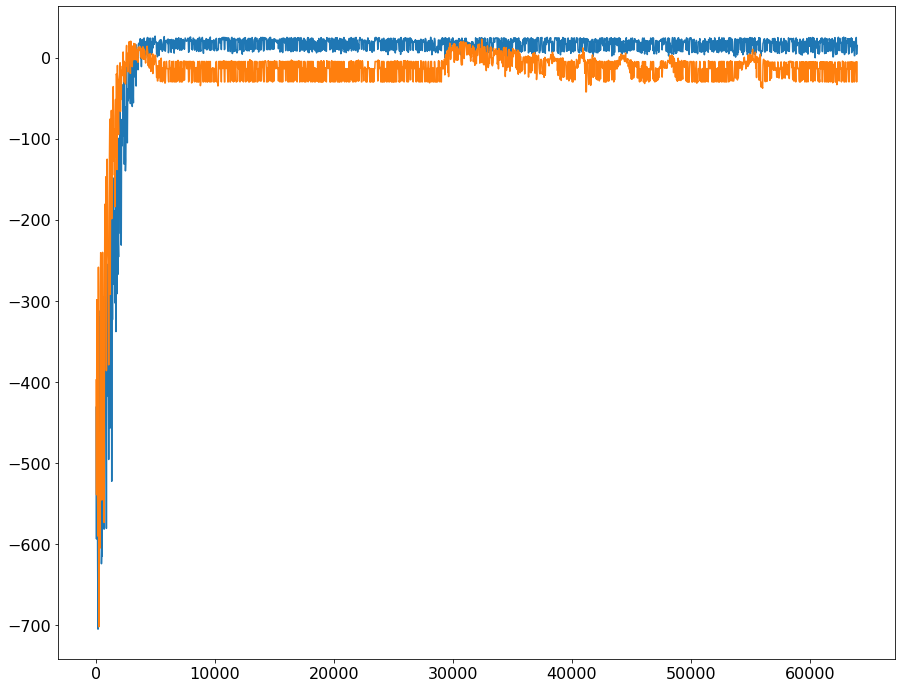

In [4]:
plt.plot(dfs['value'][:2000])
plt.plot(dfn['value'][:2000])


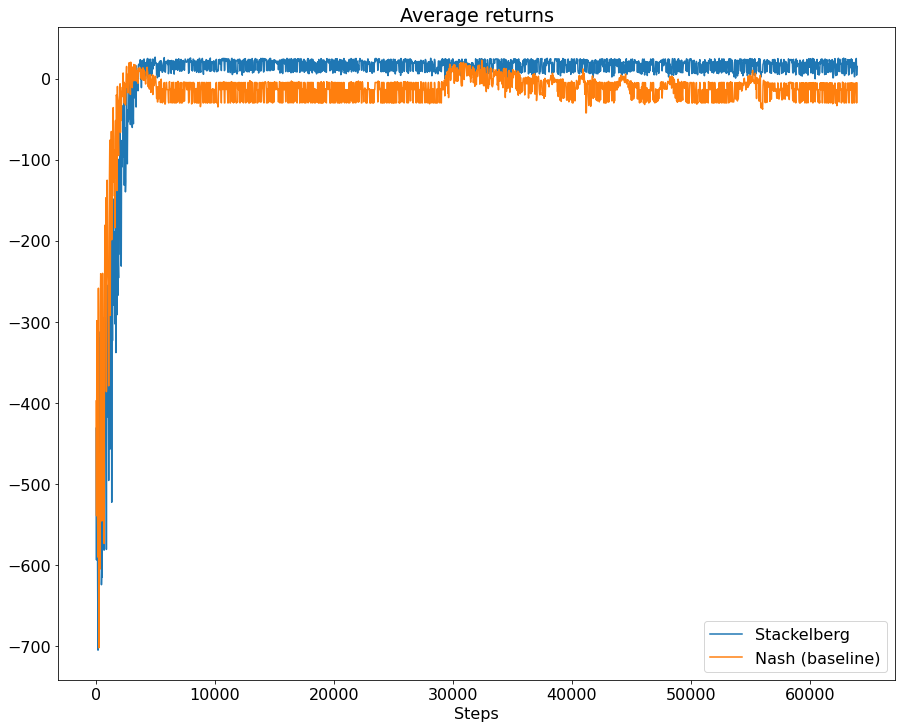

In [5]:
plt.plot(dfs['value'][:2000], label='Stackelberg')
plt.plot(dfn['value'][:2000], label='Nash (baseline)')

# Set the title
plt.title('Average returns')


# Set the x-axis label
plt.xlabel('Steps')

# Set the legend
plt.legend()

# Show the plot
plt.show()

In [9]:
dfb = pd.DataFrame()
ea = event_accumulator.EventAccumulator(f'runs4/experiment_stackelberg2023-09-23 18:15:27.247066_bellman_error_fix/values_mixed bellman', size_guidance={event_accumulator.SCALARS: 0},
)

ea.Reload()
dfb = pd.DataFrame(ea.Scalars('values'))[:2000]
dfb.index = dfb.index * 32 * 16
dfb = dfb[:60000]
dfb

,wall_time,step,value
0,1.695507e+09,0,164.032120
512,1.695508e+09,16,205.206833
1024,1.695508e+09,32,179.614380
1536,1.695508e+09,48,115.653397
2048,1.695508e+09,64,91.859711
...,...,...,...
61440,1.695514e+09,1920,27.807072
61952,1.695514e+09,1936,7.859591
62464,1.695515e+09,1952,15.190584
62976,1.695515e+09,1968,41.271698


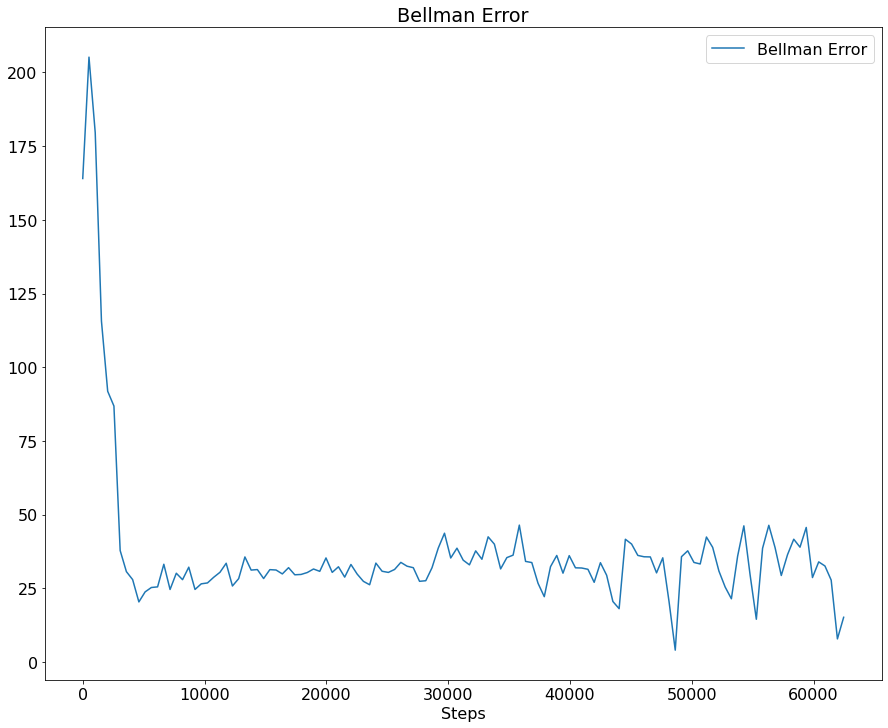

In [18]:
plt.plot(dfb['value'][:-2], label='Bellman Error')

# Set the title
plt.title('Bellman Error')


# Set the x-axis label
plt.xlabel('Steps')

# Set the legend
plt.legend()

# Show the plot
plt.show()

In [51]:

df_stack = pd.DataFrame()
for file in file_wins:

    ea = event_accumulator.EventAccumulator(f'runs/stackelberg_script_2023-05-11 13:09:02.276650//{file}', size_guidance={event_accumulator.SCALARS: 0},
    )

    ea.Reload()
    df = pd.DataFrame(ea.Scalars('num_wins'))
    df = df.rename(columns={'value': 'stackelberg_'+file})
    df_stack = pd.concat([df_stack, df], axis=1)

df_stack.head()

,wall_time,step,stackelberg_num_wins_attacker,wall_time,step,stackelberg_num_wins_defender,wall_time,step,stackelberg_num_wins_draw
0,1.683825e+09,0,1.0,1.683825e+09,0,0.0,1.683825e+09,0,0.0
1,1.683825e+09,1,1.0,1.683825e+09,1,0.0,1.683825e+09,1,0.0
2,1.683825e+09,2,0.0,1.683825e+09,2,1.0,1.683825e+09,2,0.0
3,1.683825e+09,3,0.0,1.683825e+09,3,1.0,1.683825e+09,3,0.0
4,1.683825e+09,4,0.0,1.683825e+09,4,0.0,1.683825e+09,4,1.0


In [52]:
df_stack = df_stack.drop_duplicates()
df_nash = df_nash.drop_duplicates()

df_stack = df_stack.drop(columns=['wall_time', 'step'])
df_nash = df_nash.drop(columns=['wall_time','step'])

df = pd.concat([df_stack, df_nash], axis=1)

df.head()

,stackelberg_num_wins_attacker,stackelberg_num_wins_defender,stackelberg_num_wins_draw,nash_num_wins_attacker,nash_num_wins_defender,nash_num_wins_draw
0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0


In [53]:
df.tail()

,stackelberg_num_wins_attacker,stackelberg_num_wins_defender,stackelberg_num_wins_draw,nash_num_wins_attacker,nash_num_wins_defender,nash_num_wins_draw
26995,NaN,NaN,NaN,0.0,0.0,1.0
26996,NaN,NaN,NaN,1.0,0.0,0.0
26997,NaN,NaN,NaN,0.0,0.0,1.0
26998,NaN,NaN,NaN,1.0,0.0,0.0
26999,NaN,NaN,NaN,0.0,0.0,1.0


In [54]:
df = df[['nash_num_wins_defender', 'stackelberg_num_wins_defender', 'nash_num_wins_attacker', 'stackelberg_num_wins_attacker', 'nash_num_wins_draw', 'stackelberg_num_wins_draw']]



In [55]:
plt.rcParams["figure.figsize"] = (15,12)

In [56]:
df = df.head(25000)

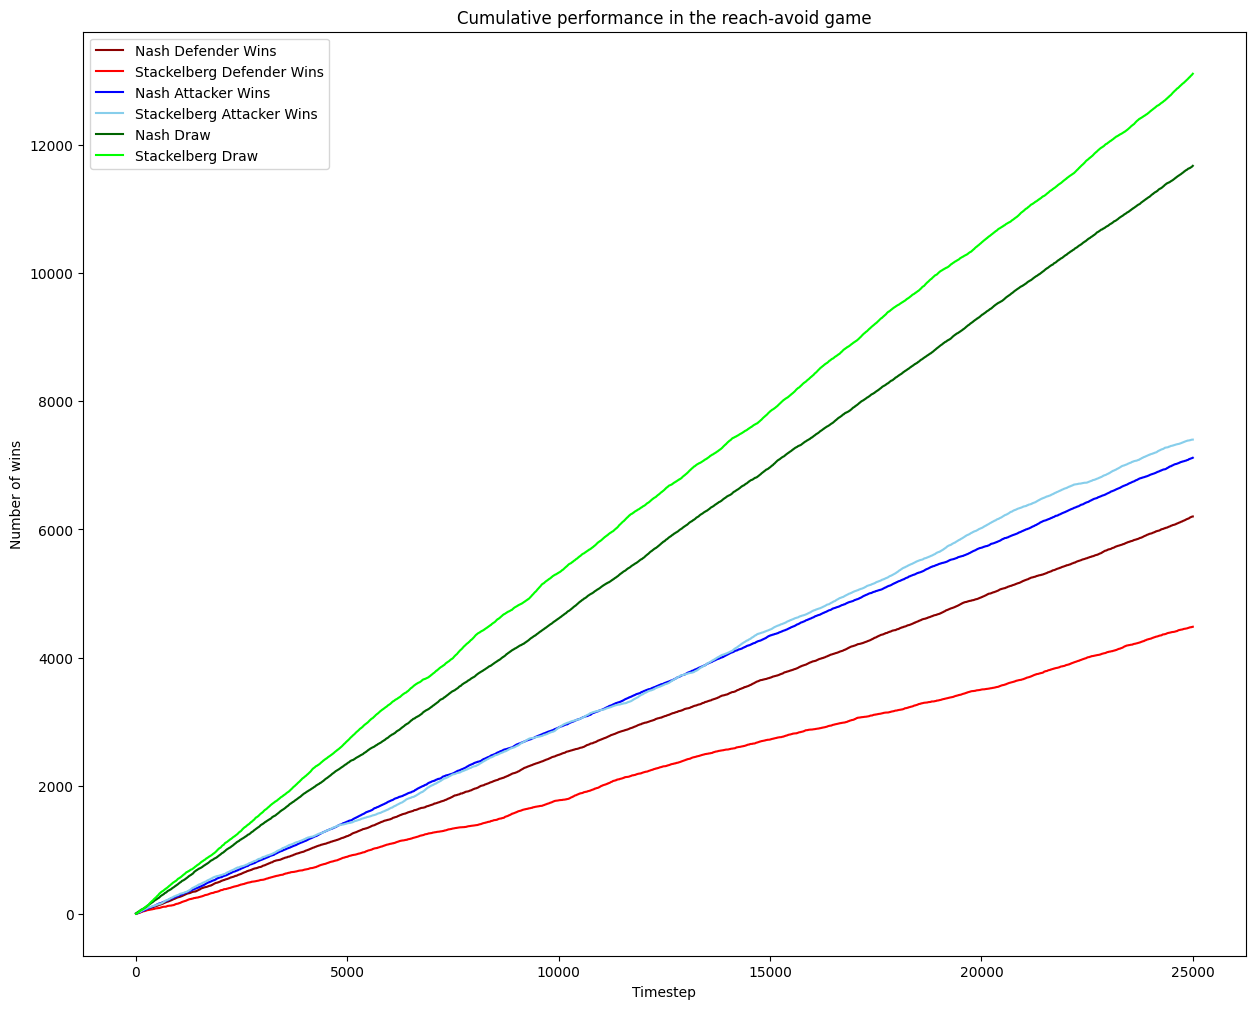

In [57]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a list of colors for the stackelberg columns
colors = ['darkred', 'red', 'blue', 'skyblue', 'darkgreen', 'lime']

# Plot the cumulative sum of each column
for column in df.columns:
    plt.plot(df[column].cumsum(), color=colors.pop(0))


# Add labels to the x-axis and y-axis
plt.xlabel('Timestep')
plt.ylabel('Number of wins')

# Add a title to the chart
plt.title('Cumulative performance in the reach-avoid game')

plt.legend(['Nash Defender Wins', 'Stackelberg Defender Wins', 'Nash Attacker Wins', 'Stackelberg Attacker Wins', 'Nash Draw', 'Stackelberg Draw'], loc='upper left')


# Show the chart
plt.show()


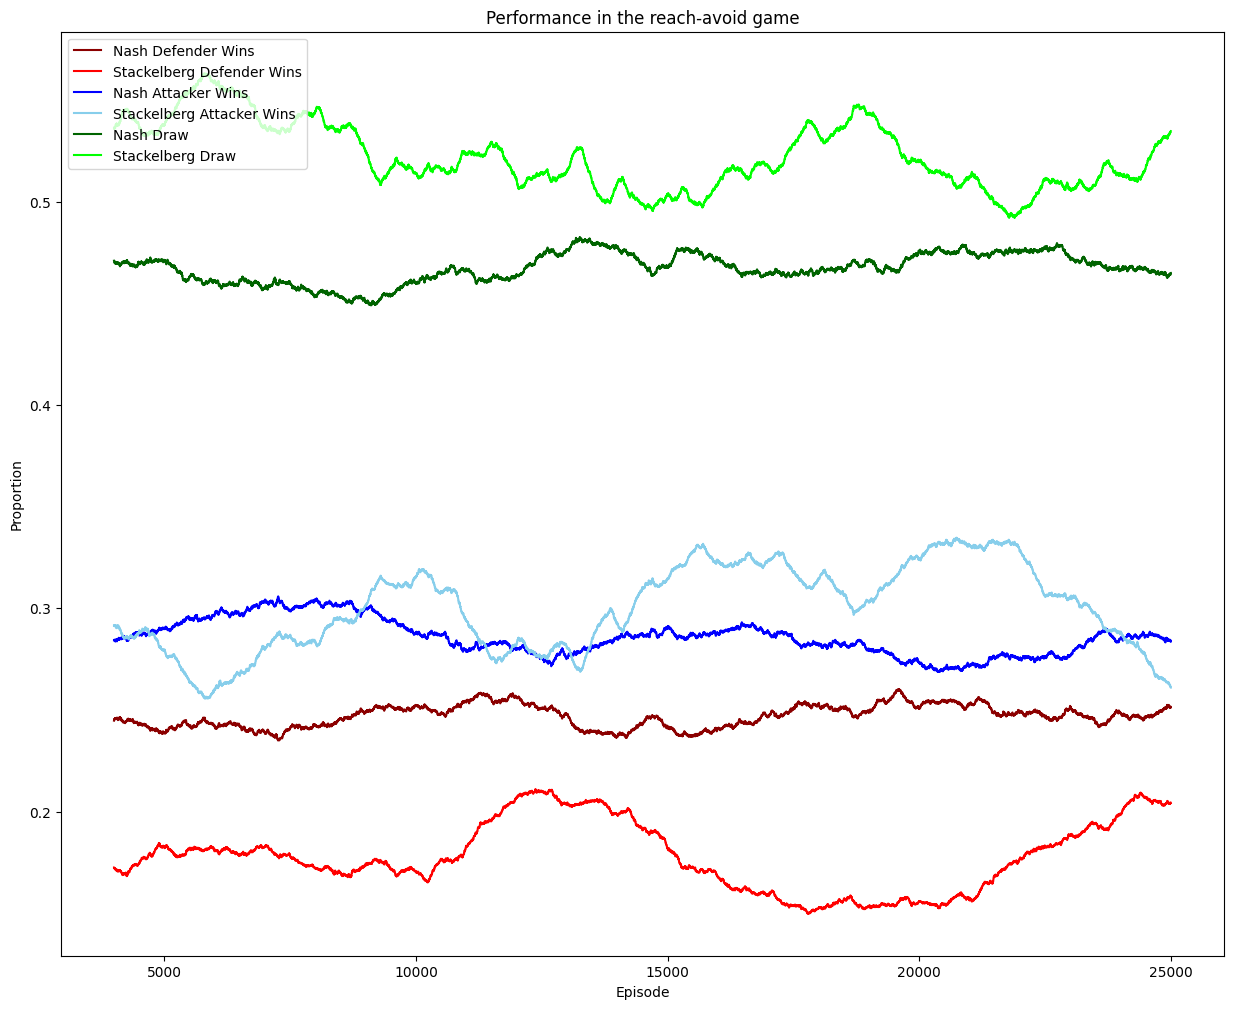

In [58]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a list of colors for the stackelberg columns
colors = ['darkred', 'red', 'blue', 'skyblue', 'darkgreen', 'lime']

# Plot the cumulative sum of each column
for column in df.columns:
    plt.plot(df[column].rolling(4000).mean(), color=colors.pop(0))


# Add labels to the x-axis and y-axis
plt.xlabel('Episode')
plt.ylabel('Proportion')

# Add a title to the chart
plt.title('Performance in the reach-avoid game')

plt.legend(['Nash Defender Wins', 'Stackelberg Defender Wins', 'Nash Attacker Wins', 'Stackelberg Attacker Wins', 'Nash Draw', 'Stackelberg Draw'], loc='upper left')


# Show the chart
plt.show()


In [60]:
import pandas as pd

# assuming df is your DataFrame
df['rewards_nash'] = df.apply(lambda row: -10 if row.nash_num_wins_defender == 1 else (10 if row.nash_num_wins_attacker == 1 else 0), axis=1)
df['rewards_stackelberg'] = df.apply(lambda row: -10 if row.stackelberg_num_wins_defender == 1 else (10 if row.stackelberg_num_wins_attacker == 1 else 0), axis=1)

df

,nash_num_wins_defender,stackelberg_num_wins_defender,nash_num_wins_attacker,stackelberg_num_wins_attacker,nash_num_wins_draw,stackelberg_num_wins_draw,rewards_nash,rewards_stackelberg
0,0.0,0.0,0.0,1.0,1.0,0.0,0,10
1,0.0,0.0,0.0,1.0,1.0,0.0,0,10
2,0.0,1.0,0.0,0.0,1.0,0.0,0,-10
3,1.0,1.0,0.0,0.0,0.0,0.0,-10,-10
4,0.0,0.0,0.0,0.0,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.0,0.0,1.0,1.0,0,0
24996,0.0,0.0,0.0,0.0,1.0,1.0,0,0
24997,0.0,0.0,1.0,0.0,0.0,1.0,10,0
24998,0.0,0.0,1.0,0.0,0.0,1.0,10,0


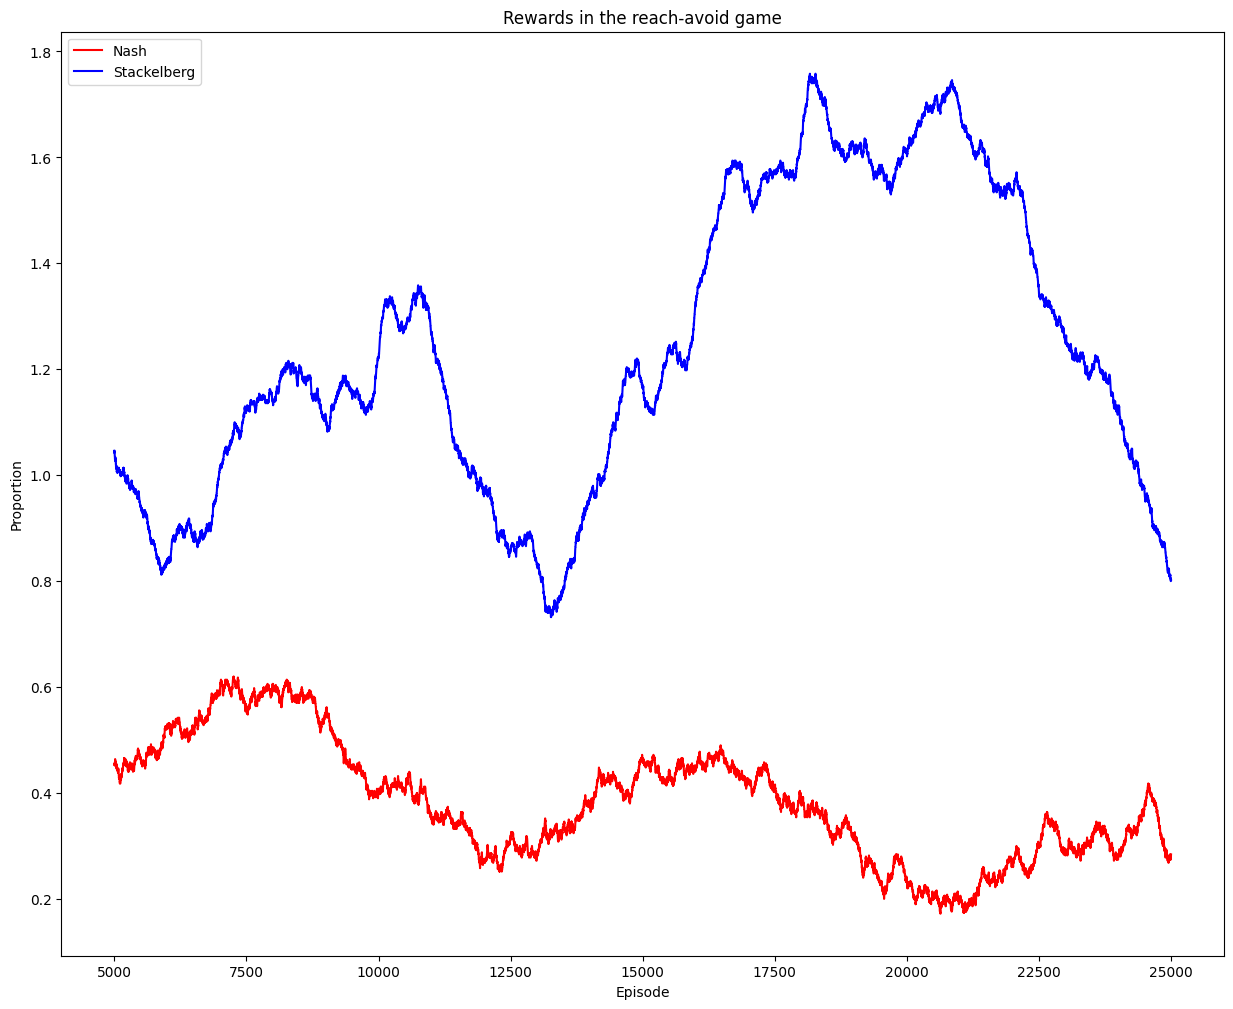

In [66]:
# Plot the cumulative sum of each column
colors = ['red', 'blue']

for column in ['rewards_nash', 'rewards_stackelberg']:
    plt.plot(df[column].rolling(5000).mean(), color=colors.pop(0))


# Add labels to the x-axis and y-axis
plt.xlabel('Episode')
plt.ylabel('Proportion')

# Add a title to the chart
plt.title('Rewards in the reach-avoid game')

plt.legend(['Nash' ,'Stackelberg'], loc='upper left')


# Show the chart
plt.show()

In [45]:
ea = event_accumulator.EventAccumulator(f'runs/nash_script_2023-05-12 03:56:25.017833/returns_attacker', size_guidance={event_accumulator.SCALARS: 0},
    )
ea.Reload()
df_nash = pd.DataFrame(ea.Scalars('returns'))
df_nash

,wall_time,step,value
0,1.683878e+09,0,0.000000
1,1.683878e+09,1,0.000000
2,1.683878e+09,2,0.000000
3,1.683878e+09,3,-1.563012
4,1.683878e+09,4,-1.247889
...,...,...,...
26995,1.683895e+09,26995,0.914801
26996,1.683895e+09,26996,0.976010
26997,1.683895e+09,26997,0.962136
26998,1.683895e+09,26998,0.970827


In [46]:
ea = event_accumulator.EventAccumulator(f'runs/stackelberg_script_2023-05-11 13:09:02.276650/returns_attacker', size_guidance={event_accumulator.SCALARS: 0},)
ea.Reload()
df_stack = pd.DataFrame(ea.Scalars('returns'))
df_stack

,wall_time,step,value
0,1.683825e+09,0,7.720823
1,1.683825e+09,1,7.966675
2,1.683825e+09,2,-0.263411
3,1.683825e+09,3,-2.557652
4,1.683825e+09,4,-1.727245
...,...,...,...
26605,1.683861e+09,26605,0.751197
26606,1.683861e+09,26606,0.751461
26607,1.683861e+09,26607,0.751424
26608,1.683861e+09,26608,0.751690


In [47]:
df_stack = df_stack.head(25000)
df_nash

df_stack.rename(columns={'value': 'stackelberg_returns'}, inplace=True)
df_nash.rename(columns={'value': 'nash_returns'}, inplace=True)

df = pd.concat([df_stack, df_nash], axis=1)


/tmp/ipykernel_511239/2369417775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stack.rename(columns={'value': 'stackelberg_returns'}, inplace=True)


In [48]:
df['nash_returns'] = df['nash_returns'].rolling(3000).mean()
df

,wall_time,step,stackelberg_returns,wall_time,step,nash_returns
0,1.683825e+09,0.0,7.720823,1.683878e+09,0,NaN
1,1.683825e+09,1.0,7.966675,1.683878e+09,1,NaN
2,1.683825e+09,2.0,-0.263411,1.683878e+09,2,NaN
3,1.683825e+09,3.0,-2.557652,1.683878e+09,3,NaN
4,1.683825e+09,4.0,-1.727245,1.683878e+09,4,NaN
...,...,...,...,...,...,...
26995,NaN,NaN,NaN,1.683895e+09,26995,0.228131
26996,NaN,NaN,NaN,1.683895e+09,26996,0.228601
26997,NaN,NaN,NaN,1.683895e+09,26997,0.229065
26998,NaN,NaN,NaN,1.683895e+09,26998,0.229529


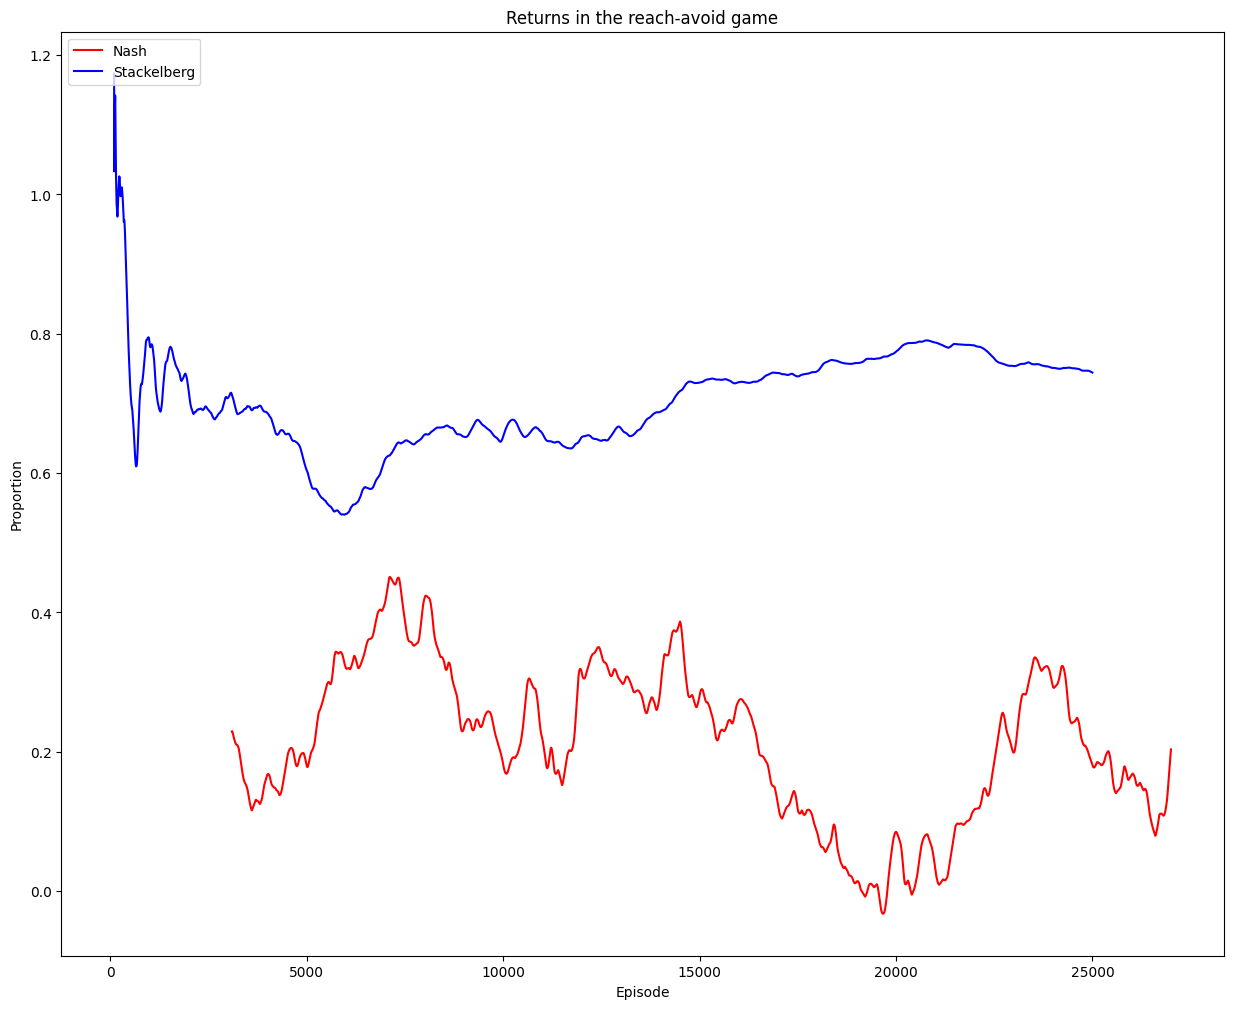

In [49]:
# Plot the cumulative sum of each column
colors = ['red', 'blue']

for column in ['nash_returns', 'stackelberg_returns']:
    plt.plot(df[column].rolling(100).mean(), color=colors.pop(0))


# Add labels to the x-axis and y-axis
plt.xlabel('Episode')
plt.ylabel('Proportion')

# Add a title to the chart
plt.title('Returns in the reach-avoid game')

plt.legend(['Nash' ,'Stackelberg'], loc='upper left')


# Show the chart
plt.show()